# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

In [221]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

#First observations on dataset
drug_safety.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [222]:
drug_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              16103 non-null  int64  
 1   sex              16103 non-null  object 
 2   trx              16103 non-null  object 
 3   week             16103 non-null  int64  
 4   wbc              9128 non-null   float64
 5   rbc              9127 non-null   float64
 6   adverse_effects  16103 non-null  object 
 7   num_effects      16103 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1006.6+ KB


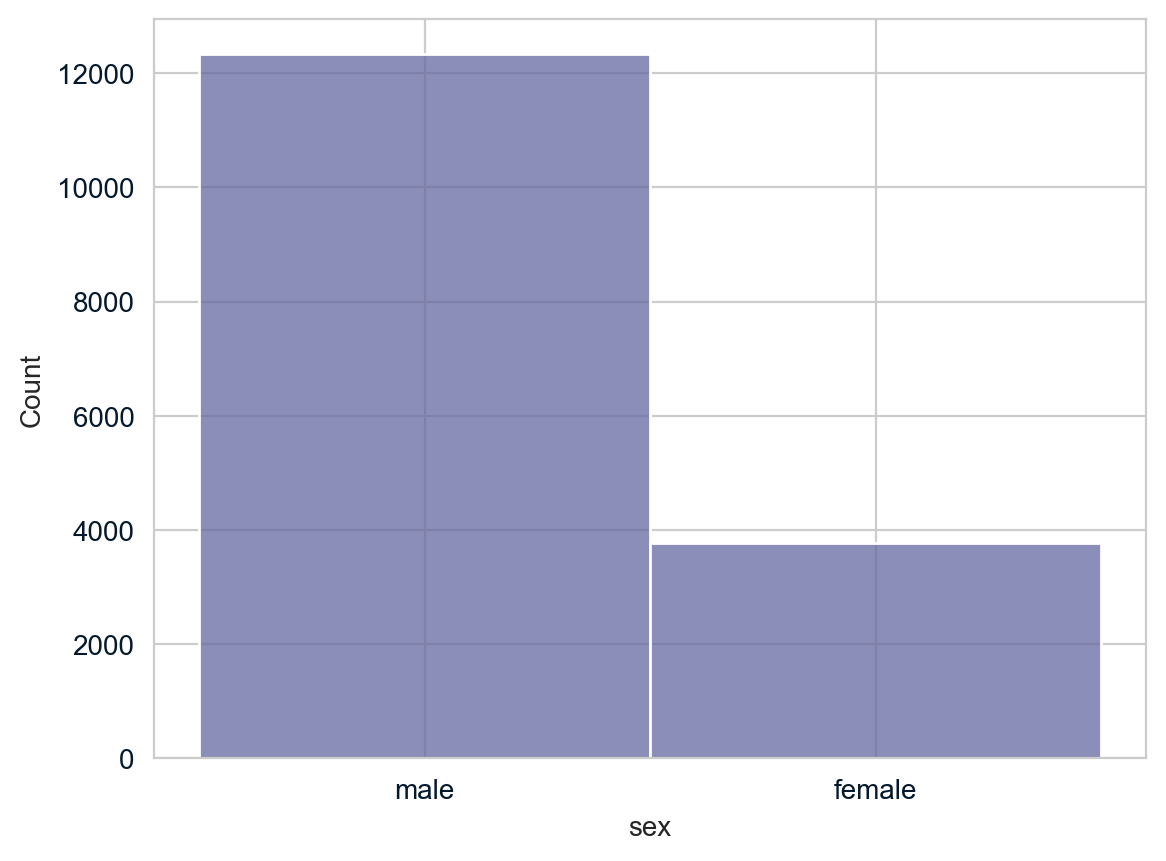

In [223]:
sns.set_style("whitegrid")
sns.histplot(data=drug_safety,x="sex");

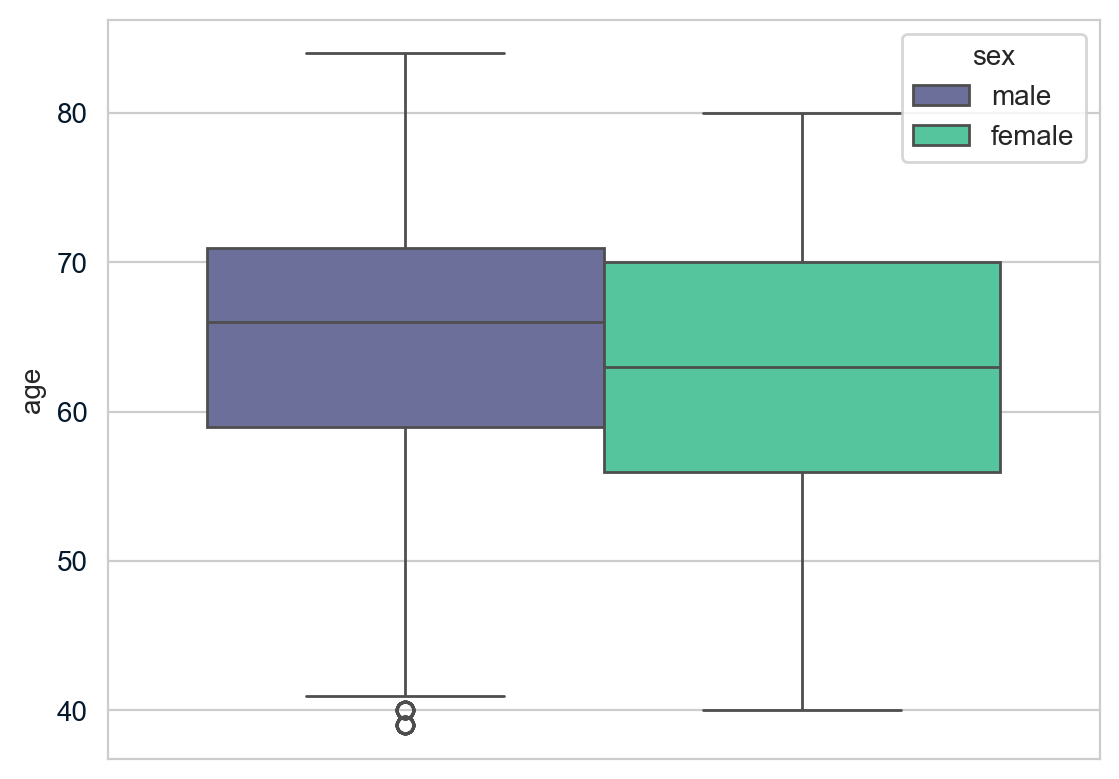

In [224]:
sns.boxplot(data=drug_safety,y="age",hue="sex");

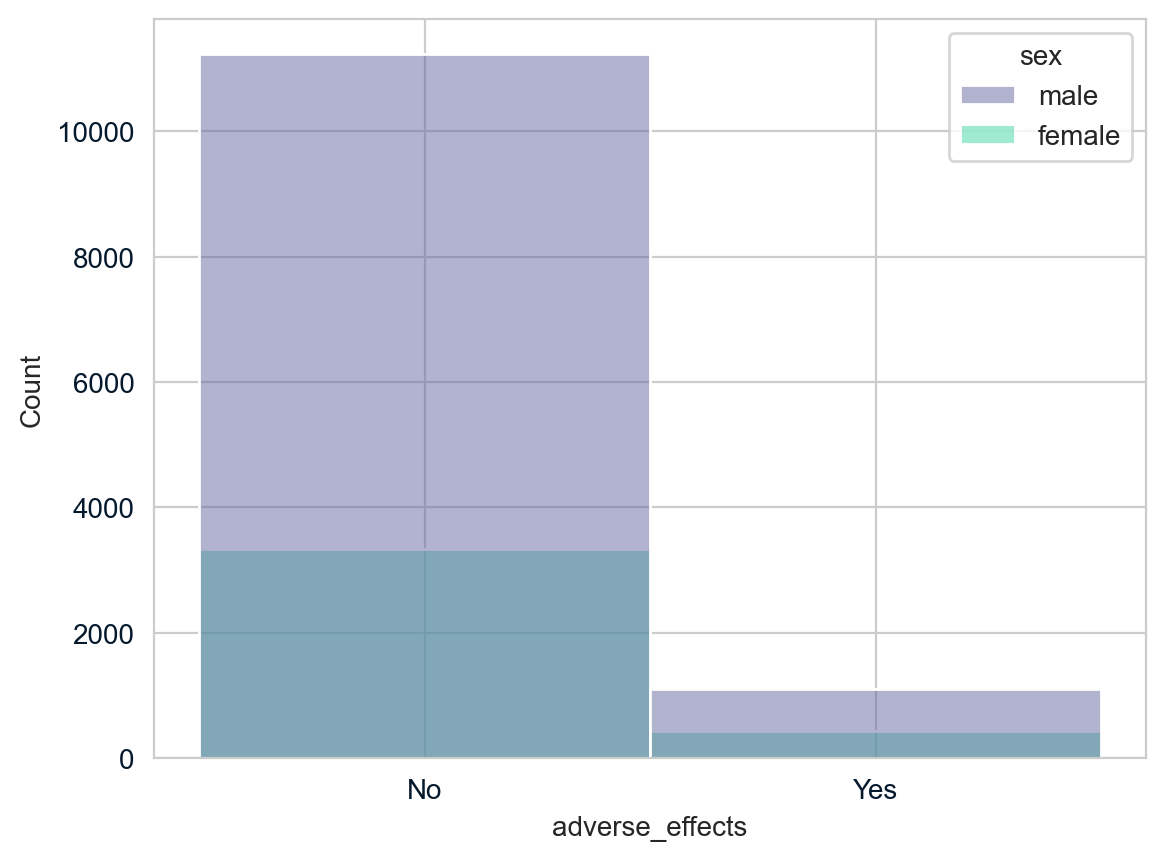

In [225]:
sns.histplot(data=drug_safety,x="adverse_effects",hue="sex");

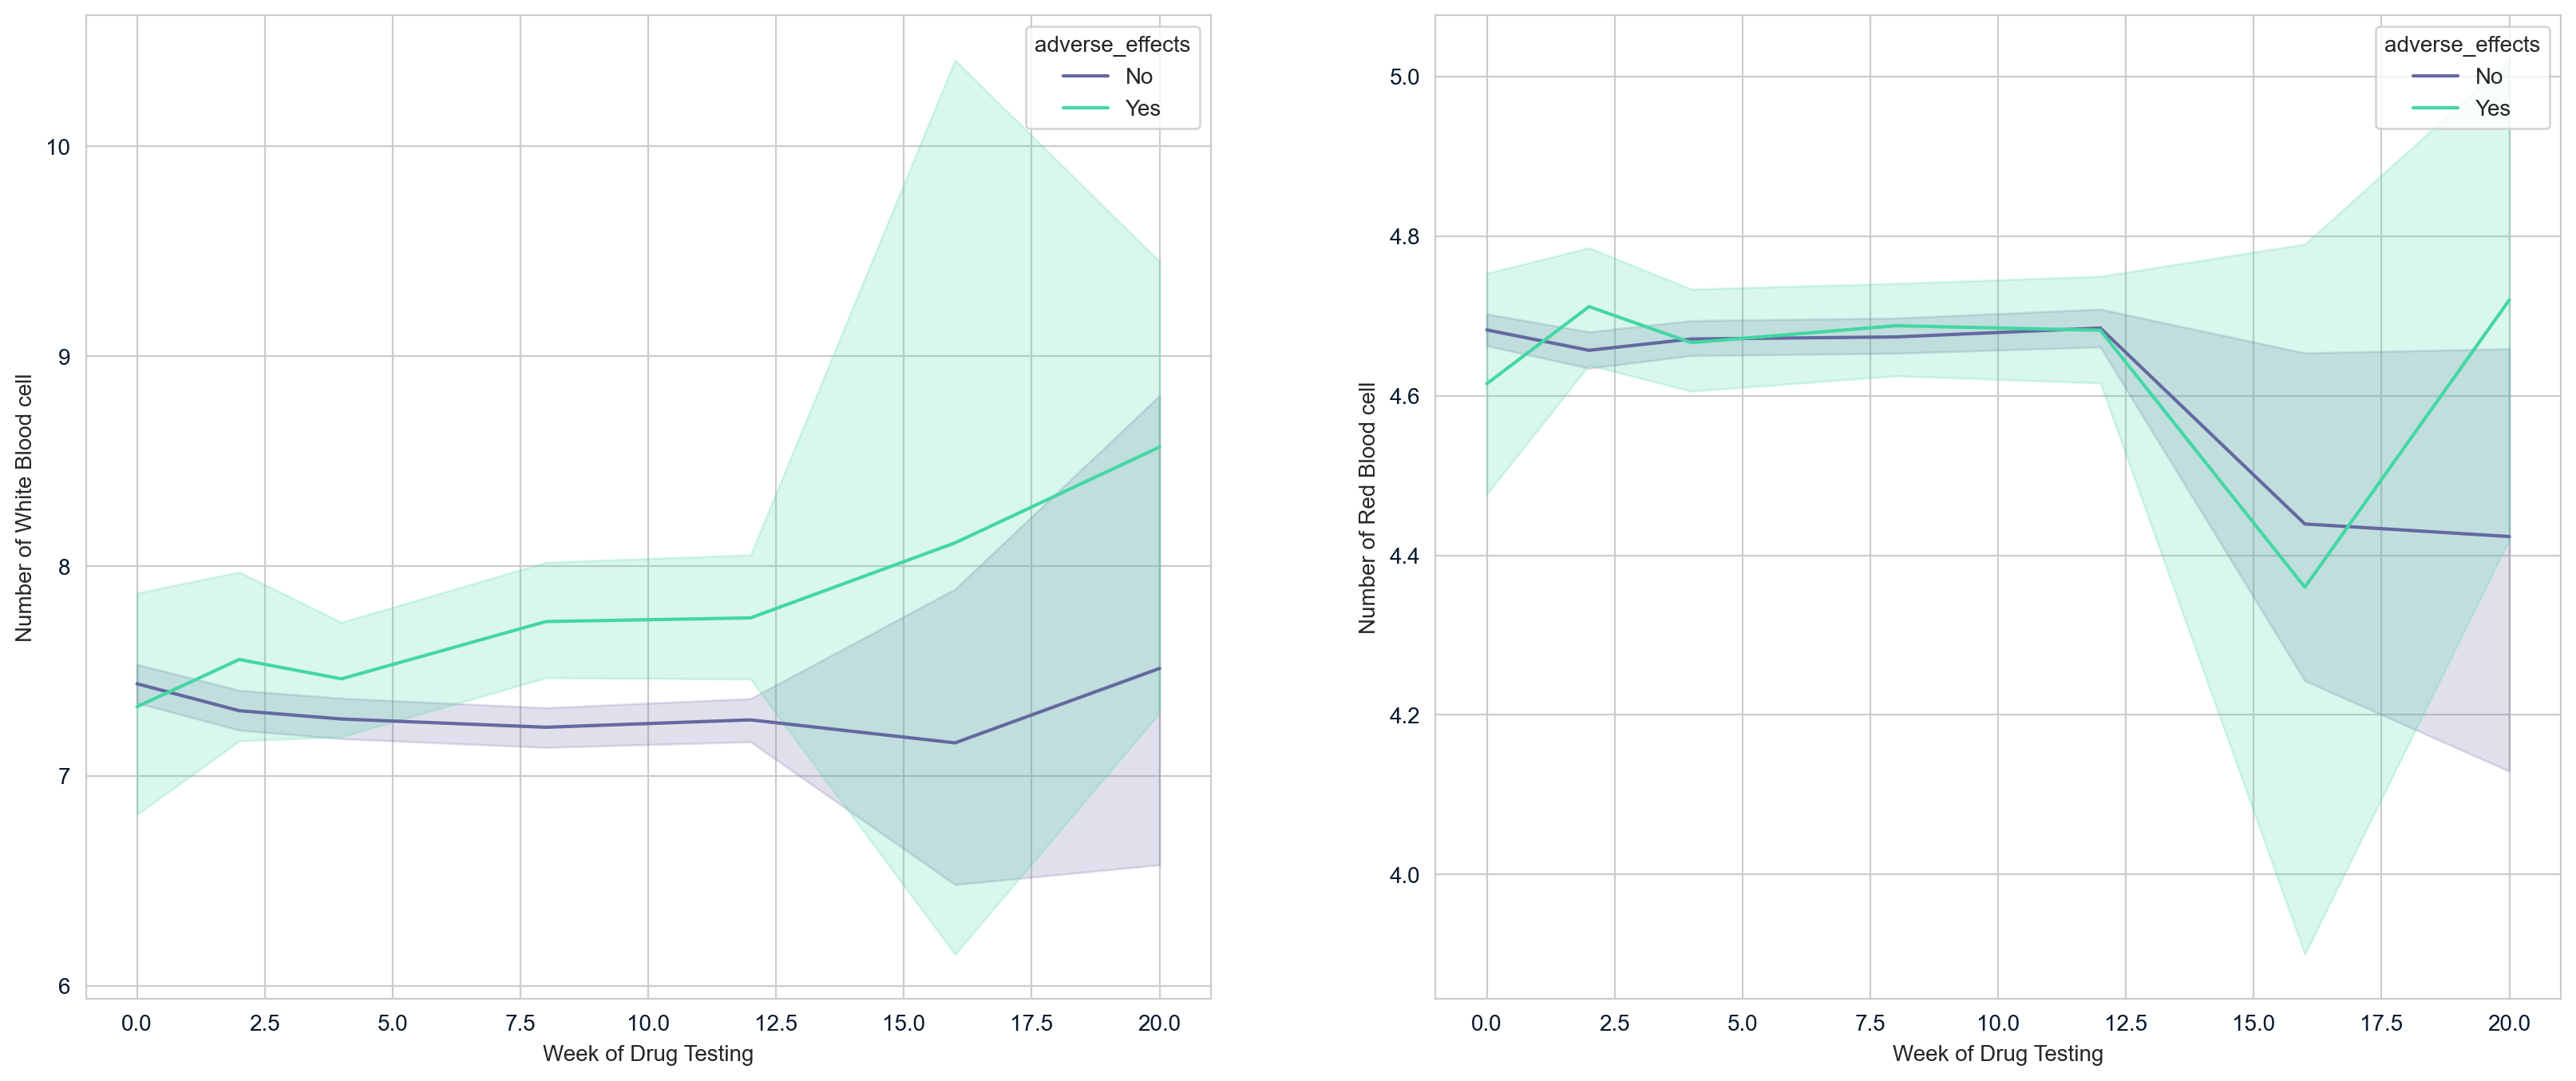

In [226]:
fig, ax = plt.subplots(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(data=drug_safety,x="week",y="wbc",hue="adverse_effects");
plt.ylabel("Number of White Blood cell");
plt.xlabel("Week of Drug Testing");
plt.subplot(1,2,2)
sns.lineplot(data=drug_safety,x="week",y="rbc",hue="adverse_effects");
plt.ylabel("Number of Red Blood cell");
plt.xlabel("Week of Drug Testing");

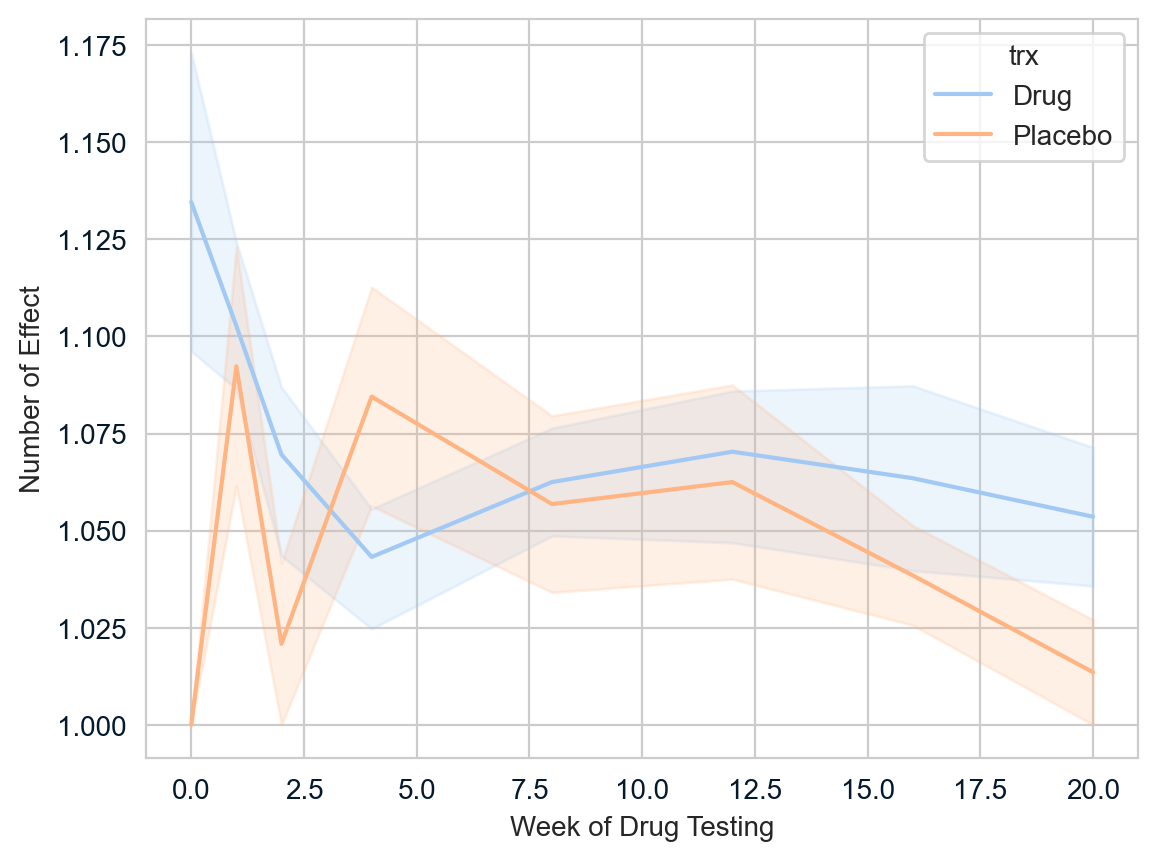

In [227]:
sns.lineplot(data=drug_safety[drug_safety["adverse_effects"]=="Yes"],x="week",y="num_effects",hue="trx",ci=60,palette="pastel");
plt.ylabel("Number of Effect");
plt.xlabel("Week of Drug Testing");

In [228]:
#We got some plots on dataset to obtain some information
#Let's continue on some testing
#We are going to check if there is significant difference between number of adverse effects of "drug" group #and "placebo" group with propotion z-test.   
#Hyphothesis'
#H0:There is no difference significantly between two groups.
#H1:There is difference significantly between two groups.

In [229]:
drug_safety.groupby("trx")["adverse_effects"].count()

trx
Drug       10727
Placebo     5376
Name: adverse_effects, dtype: int64

In [230]:
total_num=drug_safety.groupby("trx")["adverse_effects"].count()

In [231]:
total_nob=[total_num["Drug"],total_num["Placebo"]]

In [232]:
total_nob

[10727, 5376]

In [233]:
drug_safety[drug_safety["adverse_effects"]=="Yes"].groupby("trx")["adverse_effects"].count()

trx
Drug       1024
Placebo     512
Name: adverse_effects, dtype: int64

In [234]:
total_yes=drug_safety[drug_safety["adverse_effects"]=="Yes"].groupby("trx")["adverse_effects"].count()

In [235]:
total_yes_nums=[total_yes["Drug"],total_yes["Placebo"]]

In [236]:
total_yes_nums

[1024, 512]

In [237]:
two_sample_results=proportions_ztest(total_yes_nums, total_nob)

In [238]:
print("z-score=",two_sample_results[0]," p-value=",two_sample_results[1])

z-score= 0.0452182684494942  p-value= 0.9639333330262475


In [239]:
two_sample_p_value=two_sample_results[1]

In [240]:
#We can define a function which is useful to check the results.
def control(p_value,alpha):
    if p_value <= alpha:
        print("Result:H0 hyphothesis is rejected")
    else: 
        print("Result:H0 hyphothesis can not be rejected")

In [241]:
control(two_sample_p_value,0.05)

Result:H0 hyphothesis can not be rejected


In [242]:
#So the results says that there is no significant difference between two groups.

In [243]:
#The second test will check if number of adverse effects is independent of treatment and control group
#H0:Number of adverse effects has not any relation to treatment and control group. 
#H1:Number of adverse effects has a relation to treatment and control group.
#We are going to use chi-square test in order to get the result.
pingouin.chi2_independence(data=drug_safety, 
                           x="num_effects", 
                           y="trx")

(trx                 Drug      Placebo
 num_effects                          
 0            9703.794883  4863.205117
 1             960.587096   481.412904
 2              58.621126    29.378874
 3               3.996895     2.003105,
 trx          Drug  Placebo
 num_effects               
 0            9703     4864
 1             956      486
 2              63       25
 3               5        1,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  1.799644  3.0  0.615012  0.010572  0.176275
 1        cressie-read  0.666667  1.836006  3.0  0.607131  0.010678  0.179153
 2      log-likelihood  0.000000  1.922495  3.0  0.588648  0.010926  0.186033
 3       freeman-tukey -0.500000  2.001752  3.0  0.572043  0.011149  0.192379
 4  mod-log-likelihood -1.000000  2.096158  3.0  0.552690  0.011409  0.199984
 5              neyman -2.000000  2.344303  3.0  0.504087  0.012066  0.220189)

In [244]:
We need the pval which is included in the result pearson test.
result_chi2=pingouin.chi2_independence(data=drug_safety, 
                           x="num_effects", 
                           y="trx")
num_effects_p_value=result_chi2[2]["pval"][0]

In [245]:
#Check the results with the defined function
control(num_effects_p_value,0.05)

Result:H0 hyphothesis can not be rejected


In [246]:
#The result says that number of adverse effects is independent of treatment and control groups.

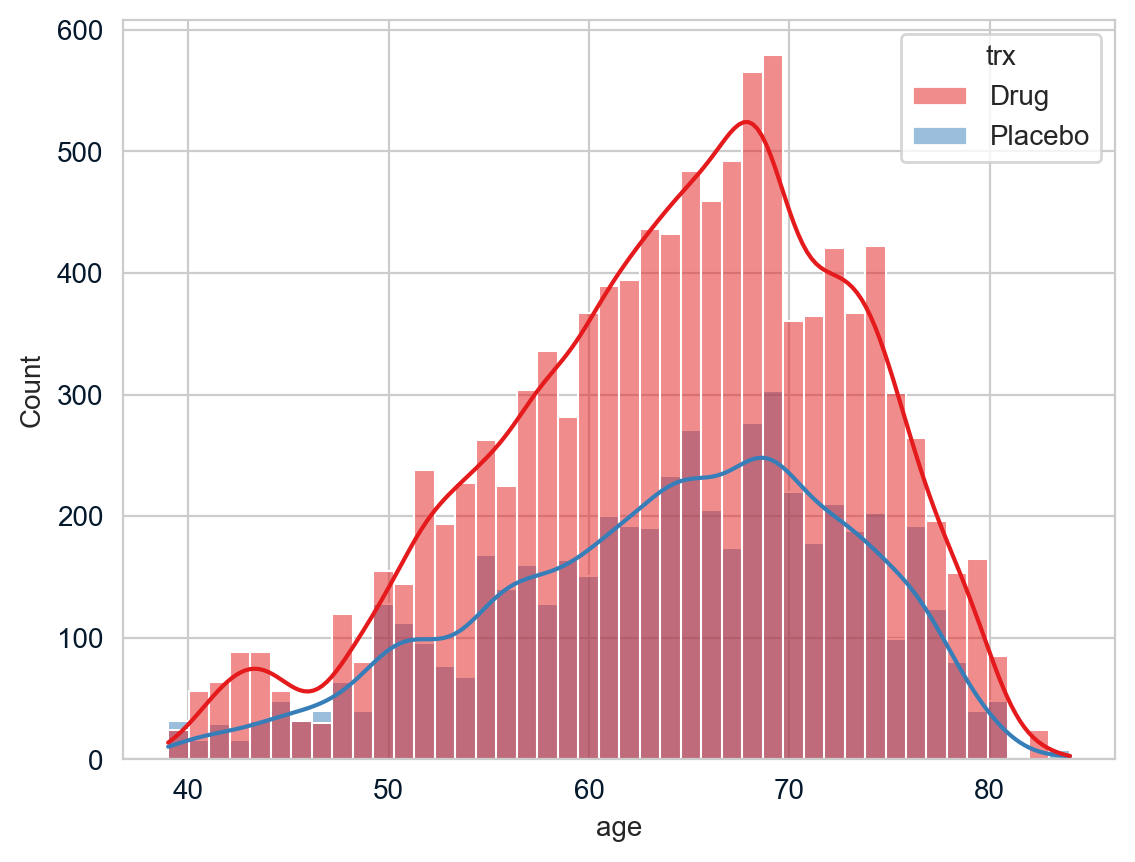

In [247]:
#Another obsevation will check randomness of their age and their group. .
sns.histplot(data=drug_safety, x="age", hue="trx",kde=True,palette="Set1");

In [248]:
#To confirm the histogram which shows normality of distrubitions between trx and age, The normality test named shapiro is needed.
#In general, We use stats.shapiro to check whether distrubition is normal or not but shapiro can be used when #the dataset has one-dimension. We need to check normality between two groups which are age-treatment group and #age-control group.
#So, We are going to use normality function from pingouin to check two-dimensional groups.
#In this way, We can decide to use which type of test we will be use.
pingouin.normality(
    data=drug_safety,
    dv='age',
    group='trx',
    method='shapiro', # the default
    alpha=0.05) # 0.05 is also the default

,W,pval,normal
trx,,,
Drug,0.976785,2.189152e-38,False
Placebo,0.975595,2.224950e-29,False


In [249]:
#Although it appears to be normally distributed in the histogram, the results show the opposite.
#So, dataset we want to observation is non-parametric
#That is why we are going to use non-parametric test named Mann-WhitneyU

age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]
age_placebo=drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

In [250]:
pingouin.mwu(age_trx, age_placebo)

,U-val,alternative,p-val,RBC,CLES
MWU,29149339.5,two-sided,0.256963,-0.01093,0.505465


In [251]:
age_group_effects_p_value=pingouin.mwu(age_trx, age_placebo)["p-val"][0]

In [252]:
#Check the result
control(age_group_effects_p_value,0.05)

Result:H0 hyphothesis can not be rejected


In [253]:
#In conclusion, the age is not related to control or treatment group.

In [254]:
#Question: What is the proportion of adverse effect by age group? 
drug_safety["age"].describe()

count    16103.000000
mean        64.117556
std          8.783207
min         39.000000
25%         58.000000
50%         65.000000
75%         71.000000
max         84.000000
Name: age, dtype: float64

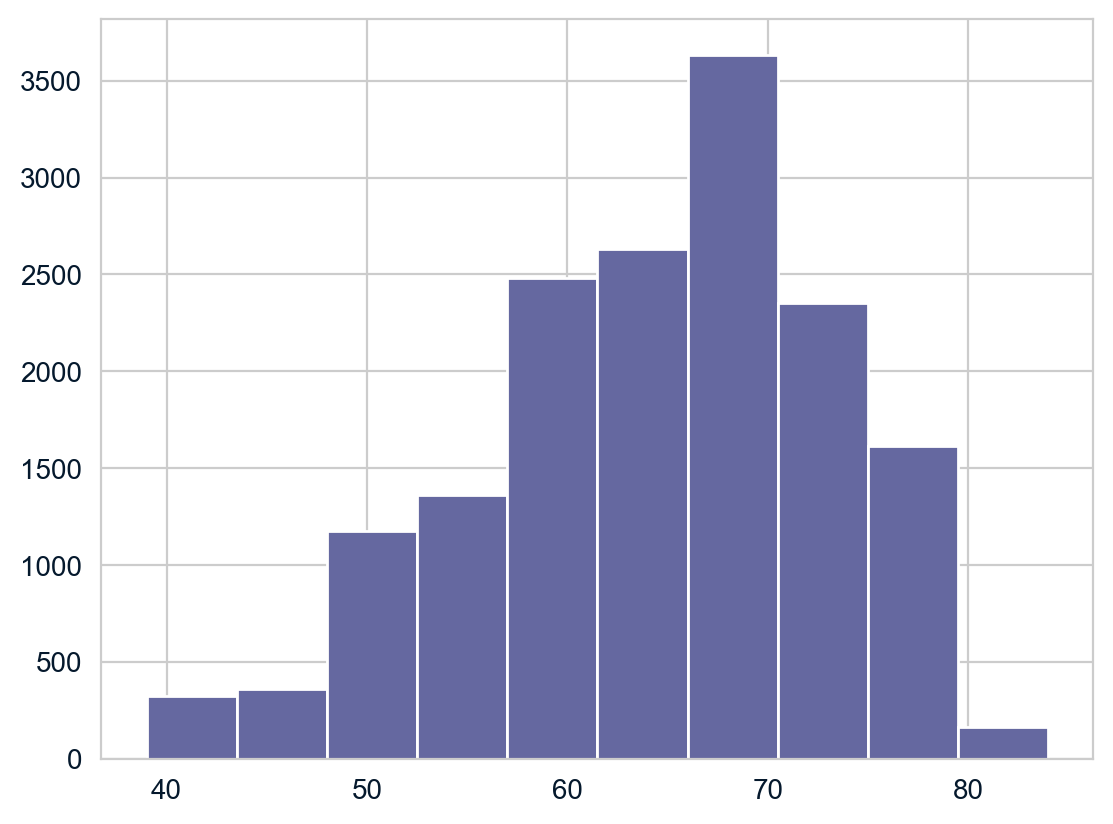

In [255]:
drug_safety["age"].hist();

In [256]:
#We determine the age groups.
drug_safety["age_group"]=drug_safety["age"].apply(lambda x:"30-40" if x<40 else
                                                  "40-50" if 40<=x<50 else
                                                  "50-60" if 50<=x<60 else
                                                  "60-70" if 60<=x<70 else
                                                  "70-80" if 70<=x<80 else
                                                  "+80" )

In [257]:
drug_safety.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects,age_group
0,62,male,Drug,0,7.3,5.1,No,0,60-70
1,62,male,Drug,1,NaN,NaN,No,0,60-70
2,62,male,Drug,12,5.6,5.0,No,0,60-70
3,62,male,Drug,16,NaN,NaN,No,0,60-70
4,62,male,Drug,2,6.6,5.1,No,0,60-70


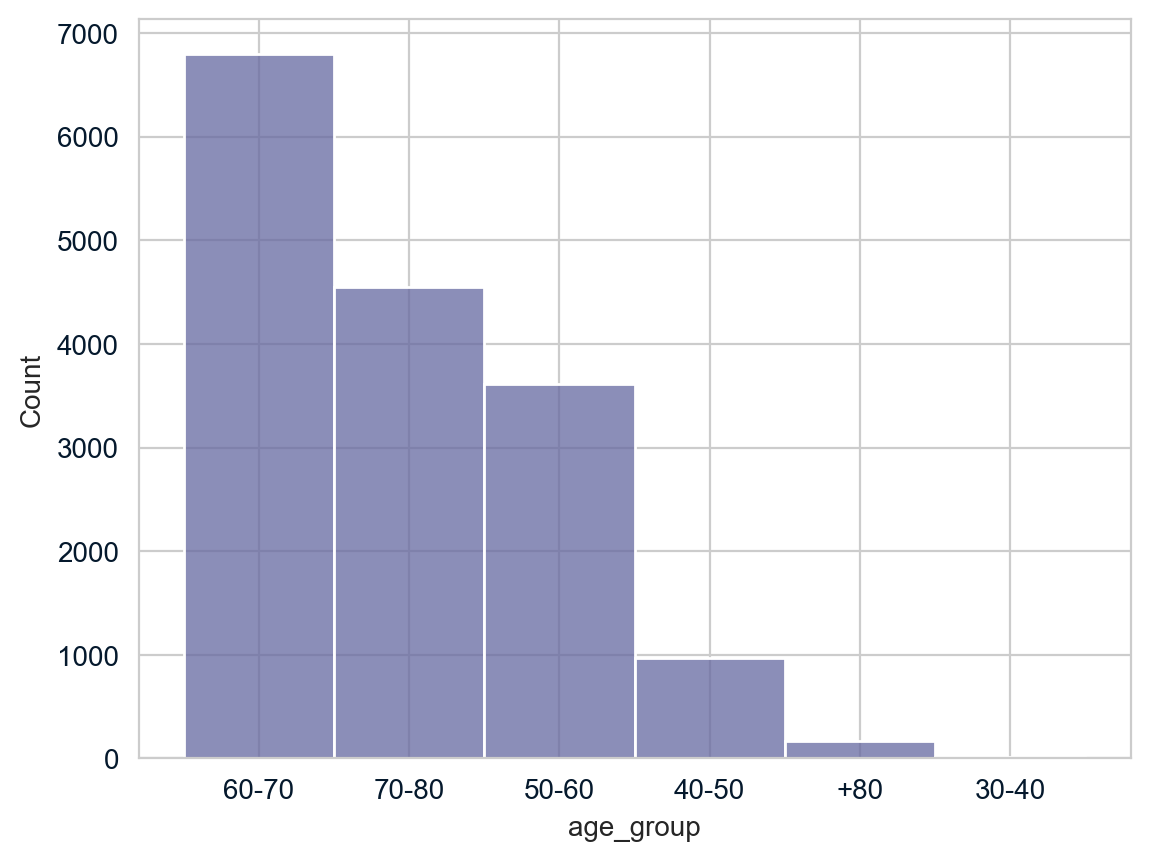

In [258]:
sns.histplot(data=drug_safety,x="age_group");

In [259]:
drug_safety.groupby(["age_group"])["adverse_effects"].value_counts(normalize=True).round(2)

age_group  adverse_effects
+80        No                 0.94
           Yes                0.06
30-40      No                 0.94
           Yes                0.06
40-50      No                 0.92
           Yes                0.08
50-60      No                 0.90
           Yes                0.10
60-70      No                 0.90
           Yes                0.10
70-80      No                 0.91
           Yes                0.09
Name: adverse_effects, dtype: float64

In [260]:
total_yes=drug_safety[drug_safety["adverse_effects"]=="Yes"]["adverse_effects"].count()

In [261]:
total=drug_safety["adverse_effects"].count()

In [262]:
prop_yes=(total_yes/total).round(2)

In [263]:
prop_yes

0.1

In [264]:
#When we observe the proportions on the groupping table, we can assume that the mean of poropotions is 10 people out of 100 people by age group. 

In [265]:
#Question: Is there any relation between age group and number of effects ?

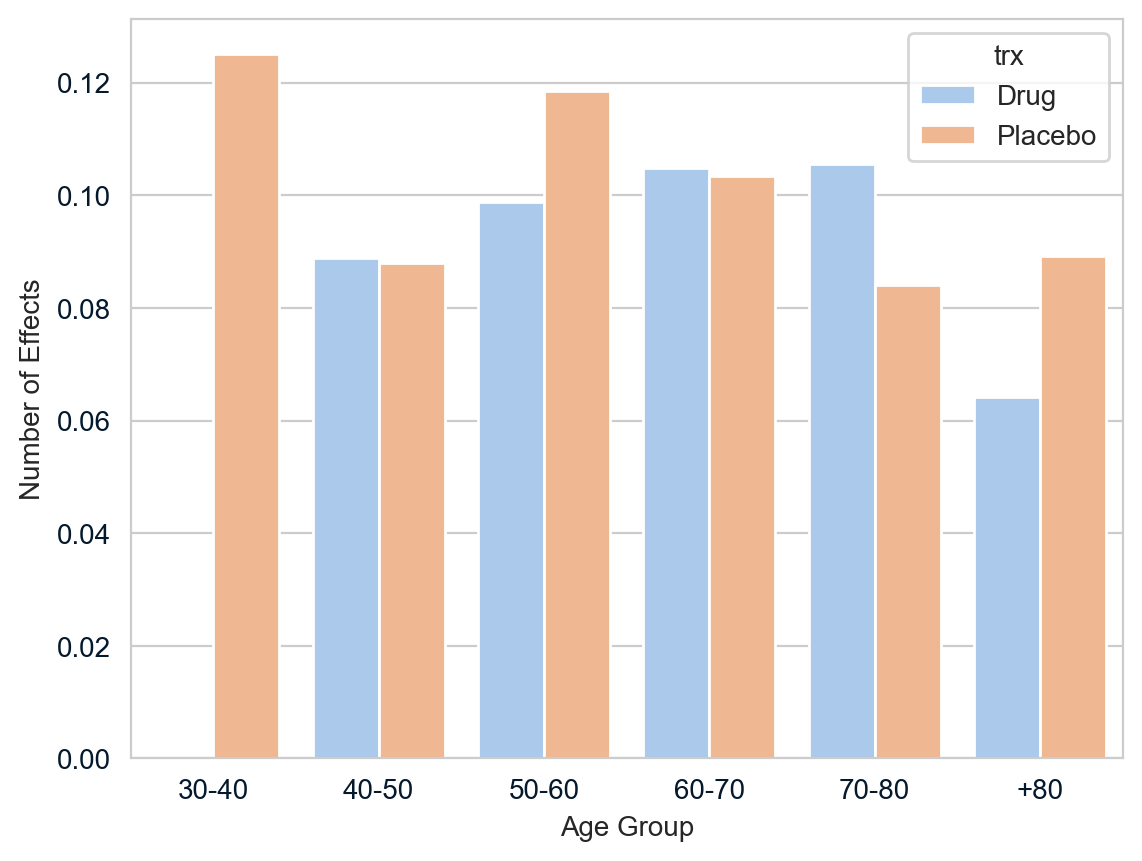

In [266]:
sns.barplot(data=drug_safety, x="age_group",y="num_effects",palette="pastel",ci=None,
                              order=["30-40","40-50","50-60","60-70","70-80","+80"],
                              hue="trx");
plt.ylabel("Number of Effects");
plt.xlabel("Age Group");

In [267]:
#To answer the question, We are going to check it with Chi Square for the second time.
#Hyphothesis'
#HO:There is not relation between age group and number of effects.
#H1:There is a relation between age group and number of effects.
pingouin.chi2_independence(data=drug_safety, 
                           x="num_effects", 
                           y="age_group")

(age_group           +80      30-40  ...        60-70        70-80
 num_effects                         ...                          
 0            149.261318  14.473825  ...  6145.043222  4115.089300
 1             14.775508   1.432777  ...   608.303173   407.356269
 2              0.901695   0.087437  ...    37.122524    24.859467
 3              0.061479   0.005962  ...     2.531081     1.694964
 
 [4 rows x 6 columns],
 age_group    +80  30-40  40-50  50-60  60-70  70-80
 num_effects                                        
 0            155     15    889   3254   6126   4128
 1              8      1     78    330    628    397
 2              2      0      4     24     36     22
 3              0      0      0      1      3      2,
                  test    lambda       chi2   dof      pval    cramer     power
 0             pearson  1.000000   9.404098  15.0  0.855459  0.013952  0.144994
 1        cressie-read  0.666667   9.570088  15.0  0.845876  0.014075  0.147080
 2      log-li

In [268]:
age_group_pval=pingouin.chi2_independence(data=drug_safety, 
                           x="num_effects", 
                           y="age_group")[2]["pval"][0]

In [269]:
#Check the result
control(age_group_pval,0.05)

Result:H0 hyphothesis can not be rejected


In [270]:
#As a result, We find out that number of effects is not dependent to any age_group